In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
df=pd.read_excel("../已清洗数据/马鞍山1号清洗202308-202412.xlsx").iloc[::,1::]
import seaborn as sns
import matplotlib.pyplot as plt
# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [87]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
device='cuda:0' if torch.cuda.is_available() else 'cpu'

def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [88]:
# df

In [89]:
# df.hist(bins=60, figsize=(15,9),color="red")
# plt.tight_layout()
# plt.show()

In [90]:
# df.info()

In [91]:
# df.columns

## 划分训练集和测试集

In [92]:
# 数据集中包含特征和目标变量，要把他们划分开
# 特征矩阵，不包含目标变量。df中去除碳排放强度列以外的列就是特征。
X1 = df.drop(columns=['碳排放强度','平均负荷'], axis=1)
# df的碳排放强度列是目标变量
y1 = df['碳排放强度']
from sklearn.model_selection import train_test_split
#划分训练集和测试集，将数据集分为训练集（80%）和测试集（20%）
# test_size=0.2 这个参数就代表20%的样本做测试集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

## 线性回归

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# 创建线性回归模型
linear_model = LinearRegression()
# 拟合模型
linear_model.fit(X1_train, y1_train)
# 在测试集上进行预测
linear_y1_pred = linear_model.predict(X1_test)

linear_mse = mean_squared_error(y1_test, linear_y1_pred)
linear_rmse = np.sqrt(linear_mse)  # Calculating RMSE
linear_mae = mean_absolute_error(y1_test, linear_y1_pred)
linear_mape = mean_absolute_percentage_error(y1_test, linear_y1_pred)
linear_r2 = r2_score(y1_test,linear_y1_pred)

# 输出结果
print(f"linear_MSE: {linear_mse:.6f}")
print(f"linear_RMSE: {linear_rmse:.6f}")
print(f"linear_MAE: {linear_mae:.6f}")
print(f"linear_MAPE: {linear_mape*100:.6f}")
print(f"linear_R Square: {linear_r2:.6f}")
print(f"回归系数: {linear_model.coef_}")
print(f"截距: {linear_model.intercept_}")

linear_MSE: 33821.116718
linear_RMSE: 183.905184
linear_MAE: 147.990618
linear_MAPE: 28.014612
linear_R Square: -0.003628
回归系数: [  1.84325174   5.36980008  10.89955529   2.0848816    6.82070568
  66.52737775  18.46436257 -11.83599296  -9.05339822  21.57614459
 -20.61343474  10.53331795 -34.39636899   0.13690523  24.68811006
  25.62273972  14.50528832  68.38843139  -5.56583273]
截距: -3281.296121692327


## 3.1 随机森林（Random Forest，RF）

In [94]:
correlation_matrix = df.corr()

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
rf_model = RandomForestRegressor(n_jobs=28,max_depth=16,n_estimators=238,random_state=42)
# rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X1_train, y1_train)
rf_y1_pred = rf_model.predict(X1_test)

rf_mse = mean_squared_error(y1_test, rf_y1_pred)
rf_rmse = np.sqrt(rf_mse)  # Calculating RMSE
rf_mae = mean_absolute_error(y1_test, rf_y1_pred)
rf_mape = mean_absolute_percentage_error(y1_test, rf_y1_pred)
rf_r2 = r2_score(y1_test, rf_y1_pred)

feature_importances = rf_model.feature_importances_
feature_names = X1.columns
# 计算特征与目标变量的相关系数
correlations =correlation_matrix['碳排放强度'].drop('碳排放强度')
# 可视化特征重要性和相关性
# plt.figure(figsize=(8, 6))
# plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
# plt.xticks(fontsize=10, rotation=90,fontweight='bold')
# plt.yticks(fontsize=12,fontweight='bold')
# plt.xlabel("特征",fontsize = 13,fontweight='bold')
# plt.ylabel("重要性",fontsize = 13,fontweight='bold')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("rf1_corr.png",dpi=500,bbox_inches='tight')
print(f"rf_MSE: {rf_mse:.6f}")
print(f"rf_RMSE: {rf_rmse:.6f}")
print(f"rf_MAE: {rf_mae:.6f}")
print(f"rf_MAPE: {rf_mape*100:.6f}")
print(f"rf_R Square: {rf_r2:.6f}")

rf_MSE: 16501.369077
rf_RMSE: 128.457655
rf_MAE: 105.639555
rf_MAPE: 18.029516
rf_R Square: 0.510329


In [96]:
'''import shap
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# Use the trained SVR model to create an explainer
explainer = shap.TreeExplainer(rf_model, X1_train)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X1_test)
# Visualize feature importance using SHAP
shap.summary_plot(shap_values, X1_test, feature_names=X1.columns)'''

"import shap\nplt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei\nplt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题\n# Use the trained SVR model to create an explainer\nexplainer = shap.TreeExplainer(rf_model, X1_train)\n# Calculate SHAP values for the test set\nshap_values = explainer.shap_values(X1_test)\n# Visualize feature importance using SHAP\nshap.summary_plot(shap_values, X1_test, feature_names=X1.columns)"

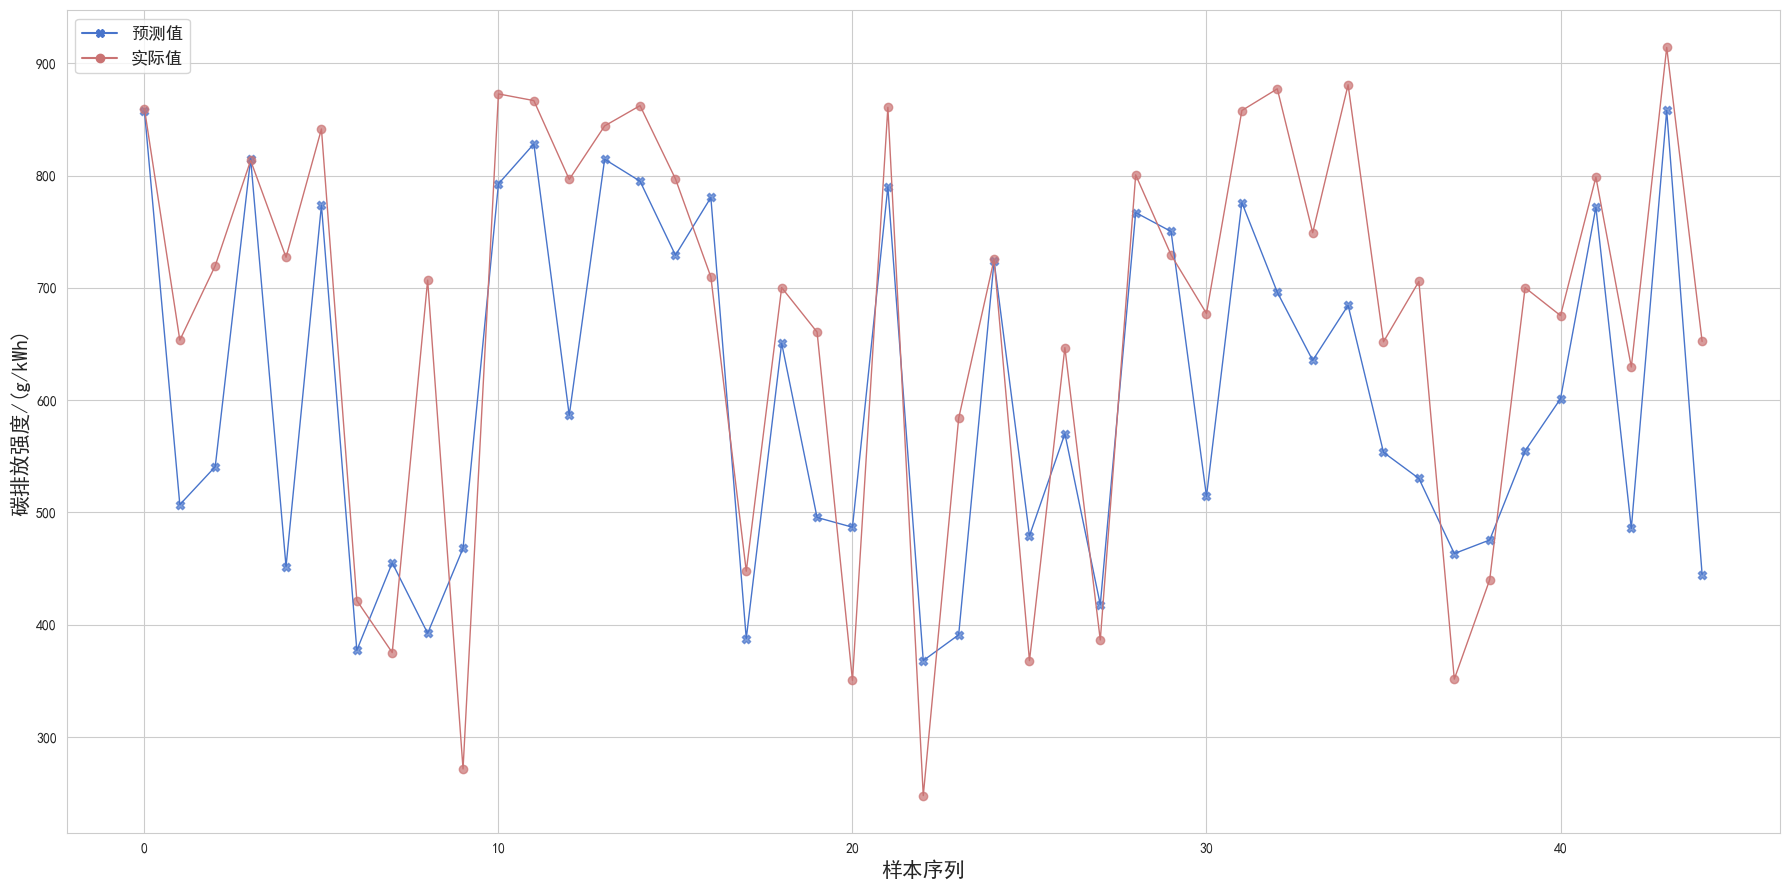

In [97]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # 导入 mlines
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(rf_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(rf_y1_pred)), rf_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("rf1.png",dpi=500,bbox_inches='tight')
plt.show()

## 3.2 XGBoost

xgb_MSE: 15497.965280
xgb_RMSE: 124.490824
xgb_MAE: 99.945295
xgb_MAPE: 17.284151
xgb_R Square: 0.540104


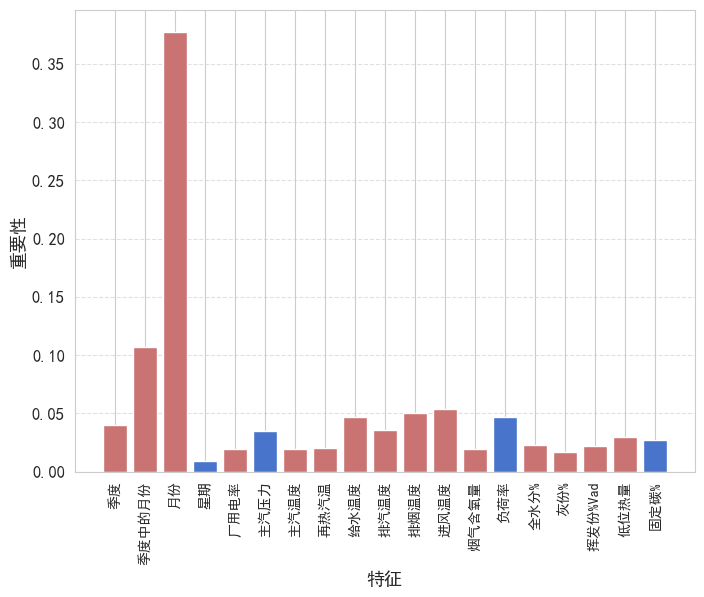

In [98]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model = XGBRegressor(
    n_estimators=29,        # 树的数量
    max_depth=9,             # 树的最大深度
    learning_rate=0.07,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    random_state=42
)
# 训练模型
xgb_model.fit(X1_train, y1_train)
from matplotlib.font_manager import FontProperties
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# Predict on the test set
xgb_y1_pred =  xgb_model.predict(X1_test)
# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred)
xgb_r2 = r2_score(y1_test, xgb_y1_pred)
# 特征重要性
feature_importances = xgb_model.feature_importances_
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13)
plt.ylabel("重要性",fontsize = 13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("xgb1_corr.png",dpi=500,bbox_inches='tight')
print(f"xgb_MSE: {xgb_mse:.6f}")
print(f"xgb_RMSE: {xgb_rmse:.6f}")
print(f"xgb_MAE: {xgb_mae:.6f}")
print(f"xgb_MAPE: {xgb_mape*100:.6f}")
print(f"xgb_R Square: {xgb_r2:.6f}")

C:\Users\97112\AppData\Local\Temp\ipykernel_19468\2314767493.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_correlations = correlations[sorted_idx]  # 排序后的相关性


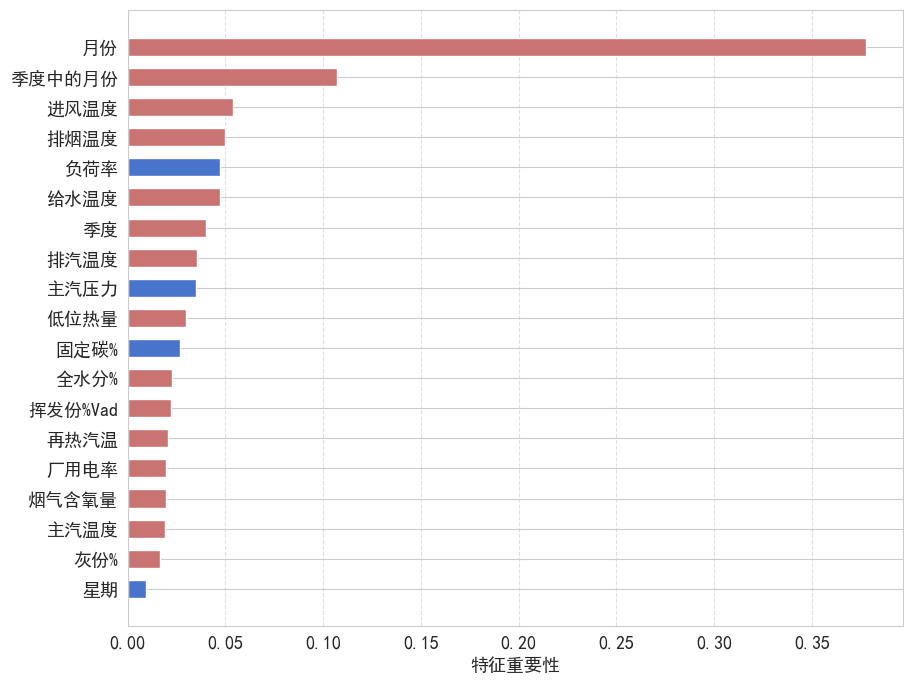

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# 假设correlations数组已存在，它表示每个特征的相关性
# 按特征重要性排序
sorted_idx = np.argsort(feature_importances)  # 获取按重要性排序的索引
sorted_feature_names = np.array(feature_names)[sorted_idx]  # 排序后的特征名
sorted_feature_importances = feature_importances[sorted_idx]  # 排序后的特征重要性
sorted_correlations = correlations[sorted_idx]  # 排序后的相关性


# 可视化特征重要性和正反相关性
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_feature_names, sorted_feature_importances,height = 0.6,
                color=np.where(sorted_correlations > 0, '#CA7373', '#4874CB'))

# 设置y轴标签的字体粗细
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.xlabel("特征重要性", fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.savefig("feature.png",dpi=1200,bbox_inches='tight')
plt.show()


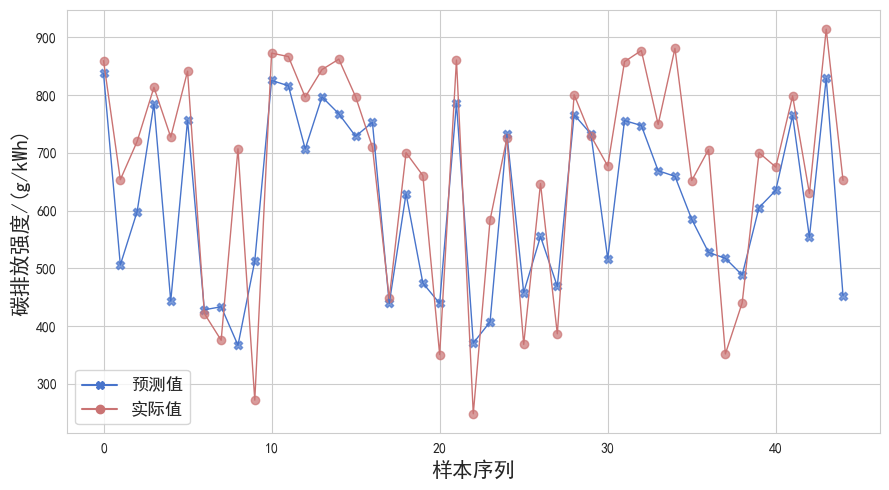

In [100]:
import matplotlib.lines as mlines  # 导入 mlines
#xgb 机组1 测试集
# 绘制test data预测值和真实值
plt.figure(figsize=(9, 5))
plt.plot(xgb_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(xgb_y1_pred)), xgb_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("xgb1.png",dpi=500,bbox_inches='tight')
plt.show()


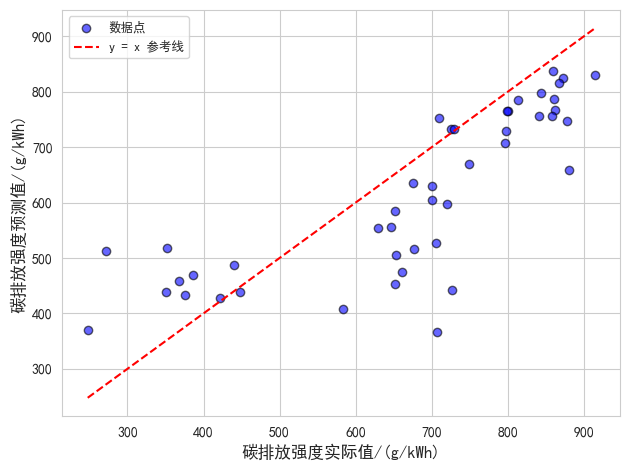

In [101]:
# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred)
xgb_r2 = r2_score(y1_test, xgb_y1_pred)

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
#plt.savefig('预测值与实际值的吻合度.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


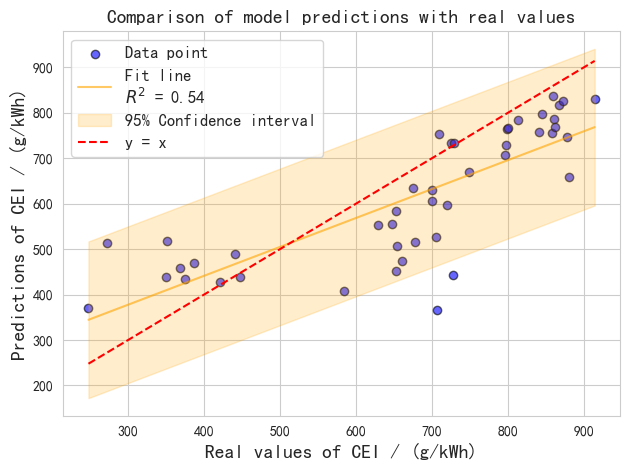

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，rf_y1_pred 是 RF 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, xgb_y1_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = xgb_y1_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': xgb_y1_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='Data point')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"Fit line\n$R^2$ = {xgb_r2:.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.2, label='95% Confidence interval')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x')  # 画出y=x的对角线

# 图表标题和标签
plt.title("Comparison of model predictions with real values", fontsize=14)
plt.xlabel("Real values of CEI / (g/kWh)", fontsize=14)
plt.ylabel("Predictions of CEI / (g/kWh)", fontsize=14)

# 显示图例
plt.legend(fontsize=12)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度_RF_with_fit_line_and_ci_sorted.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


## 关系图

In [20]:
X1_test.columns

Index(['平均负荷', '厂用电率', '主汽压力', '主汽温度', '再热汽温', '给水温度', '排汽温度', '排烟温度', '进风温度',
       '烟气含氧量', '负荷率', '全水分%', '灰份%', '挥发份%Vad', '低位热量', '固定碳%', '负荷'],
      dtype='object')

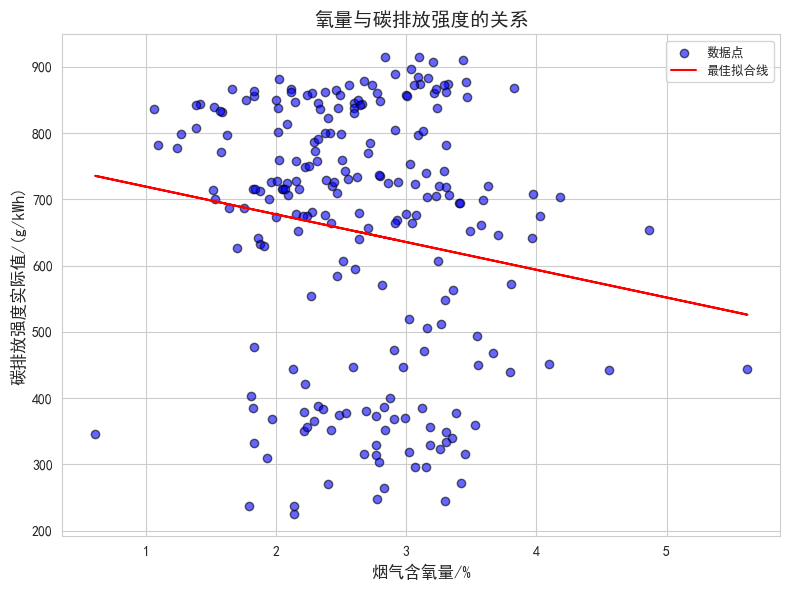

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 假设 X1 和 y1 是包含氧量和碳排放强度的列

# 创建一个单独的图
plt.figure(figsize=(8, 6))

# 绘制氧量与碳排放强度的散点图
plt.scatter(X1['烟气含氧量'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 计算最佳拟合线
slope, intercept, _, _, _ = linregress(X1['烟气含氧量'], y1)

# 绘制最佳拟合线
plt.plot(X1['烟气含氧量'], slope * X1['烟气含氧量'] + intercept, color='red', label='最佳拟合线')

# 设置标签和标题
plt.xlabel("烟气含氧量/%", fontsize=12)
plt.ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.title("氧量与碳排放强度的关系", fontsize=14)
plt.legend(fontsize=9)

# 设置坐标轴刻度
plt.tick_params(axis='both', which='major', labelsize=10)

# 显示图表
plt.tight_layout()

# 保存图像
# plt.savefig('氧量与碳排放强度关系.png', dpi=1200, bbox_inches='tight')  # 保存为PNG图像
plt.show()


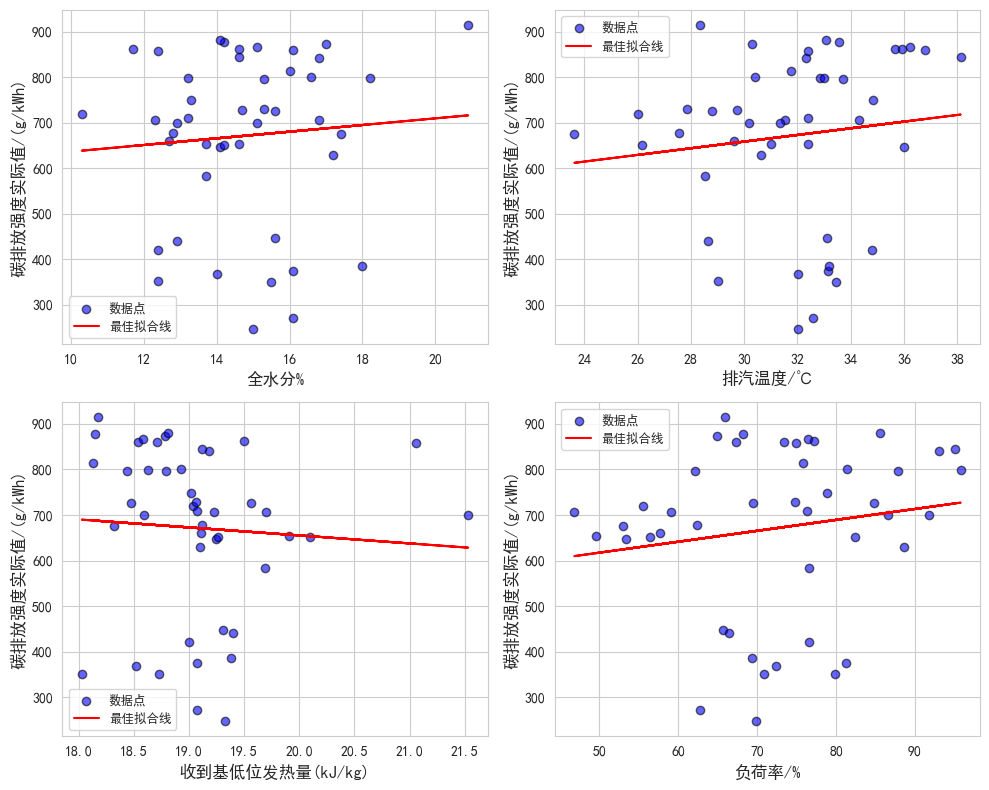

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: 全水分（%） vs 碳排放强度
axs[0, 0].scatter(X1_test['全水分%'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['全水分%'], y1_test)
axs[0, 0].plot(X1_test['全水分%'], slope * X1_test['全水分%'] + intercept, color='red', label='最佳拟合线')
axs[0, 0].set_xlabel('全水分%', fontsize=12)
axs[0, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 0].legend(fontsize=9)
axs[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: 送风温度 vs 碳排放强度
axs[0, 1].scatter(X1_test["排汽温度"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test["排汽温度"], y1_test)
axs[0, 1].plot(X1_test["排汽温度"], slope * X1_test["排汽温度"] + intercept, color='red', label='最佳拟合线')
axs[0, 1].set_xlabel("排汽温度/℃", fontsize=12)
axs[0, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 1].legend(fontsize=9)
axs[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 3: 收到基低位发热量(kJ/kg) vs 碳排放强度
axs[1, 0].scatter(X1_test['低位热量'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['低位热量'], y1_test)
axs[1, 0].plot(X1_test['低位热量'], slope * X1_test['低位热量'] + intercept, color='red', label='最佳拟合线')
axs[1, 0].set_xlabel('收到基低位发热量(kJ/kg)', fontsize=12)
axs[1, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 0].legend(fontsize=9)
axs[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 4: 负荷 vs 碳排放强度
axs[1, 1].scatter(X1_test["负荷率"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test["负荷率"], y1_test)
axs[1, 1].plot(X1_test["负荷率"], slope * X1_test["负荷率"] + intercept, color='red', label='最佳拟合线')
axs[1, 1].set_xlabel("负荷率/%", fontsize=12)
axs[1, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 1].legend(fontsize=9)
axs[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the combined plot
plt.show()


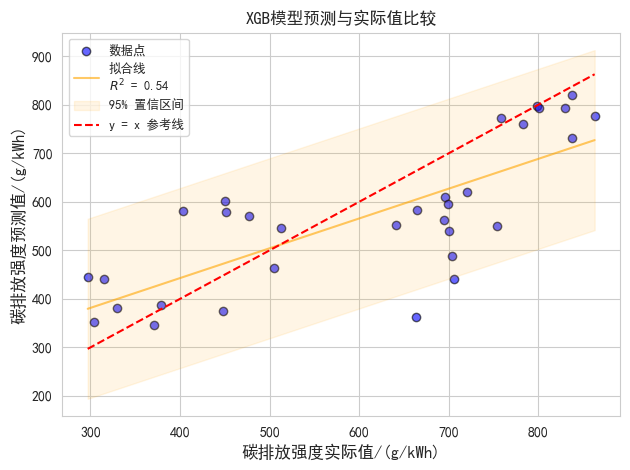

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，xgb_y1_pred 是 XGB 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, xgb_y1_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = xgb_y1_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': xgb_y1_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {r2_score(y1_test, xgb_y1_pred):.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.1, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度_XGB.png', dpi=2000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


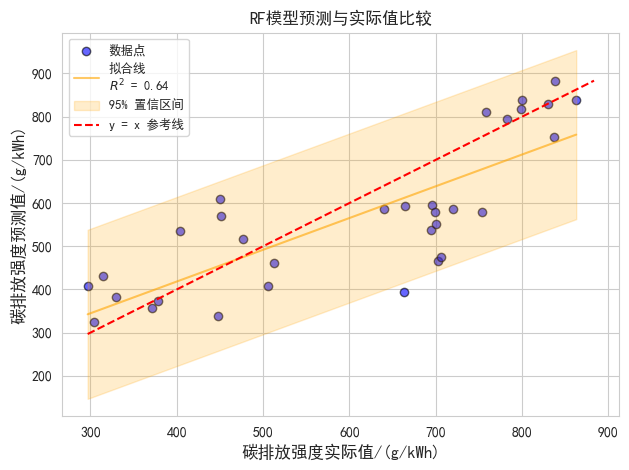

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，rf_y1_pred 是 RF 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, rf_y1_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = rf_y1_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': rf_y1_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(sorted_y_test, sorted_y_pred)[0,1]**2:.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.2, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("RF模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度_RF_with_fit_line_and_ci_sorted.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


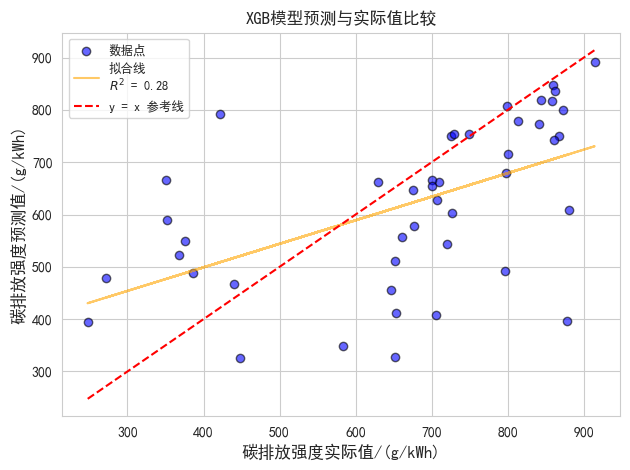

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 y1_test 是实际值，xgb_y1_pred 是XGB模型的预测值

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 使用numpy.polyfit拟合线，1表示线性拟合（一次多项式）
z = np.polyfit(y1_test, xgb_y1_pred, 1)
p = np.poly1d(z)

# 绘制拟合线
plt.plot(y1_test, p(y1_test), color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(y1_test, xgb_y1_pred)[0,1]**2:.2f}")

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度_with_fit_line.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


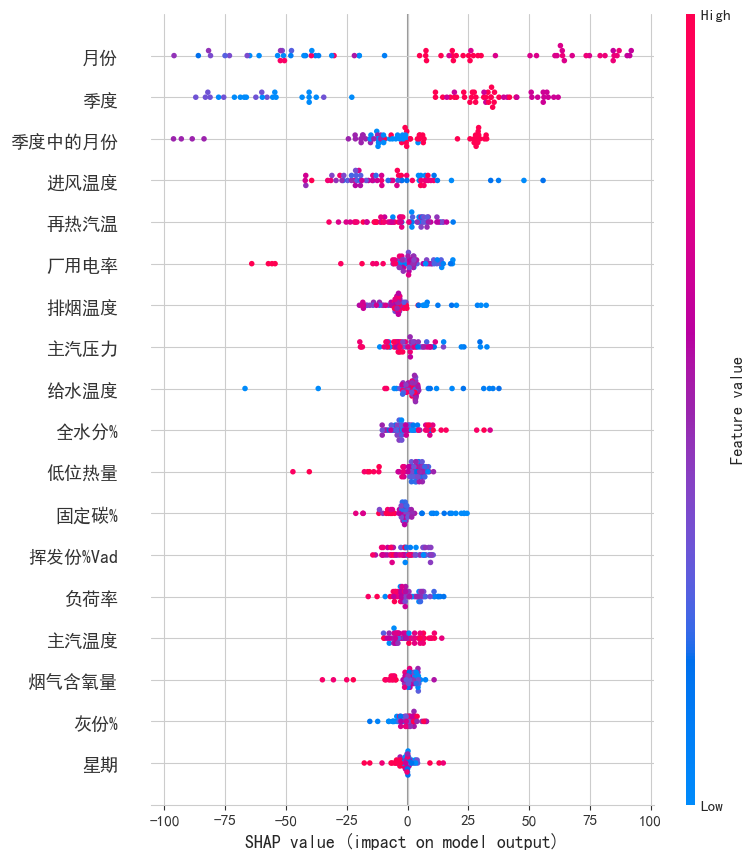

In [136]:
'''import shap
# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X1_test, show=False)
# plt.savefig('shap.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()
'''

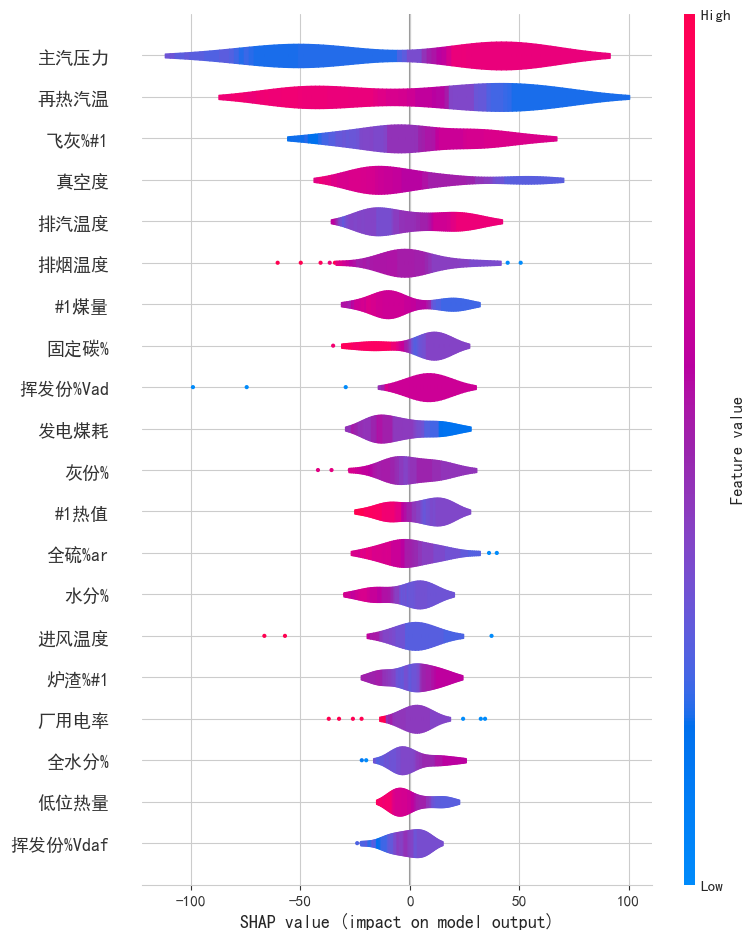

In [25]:
'''import shap
import matplotlib.pyplot as plt

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP violin plot
shap.summary_plot(shap_values, X1_test, plot_type="violin", show=False)

# Save the plot as a PNG with high resolution
# plt.savefig('shap_violin.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()
#'#CA7373', '#4874CB'''

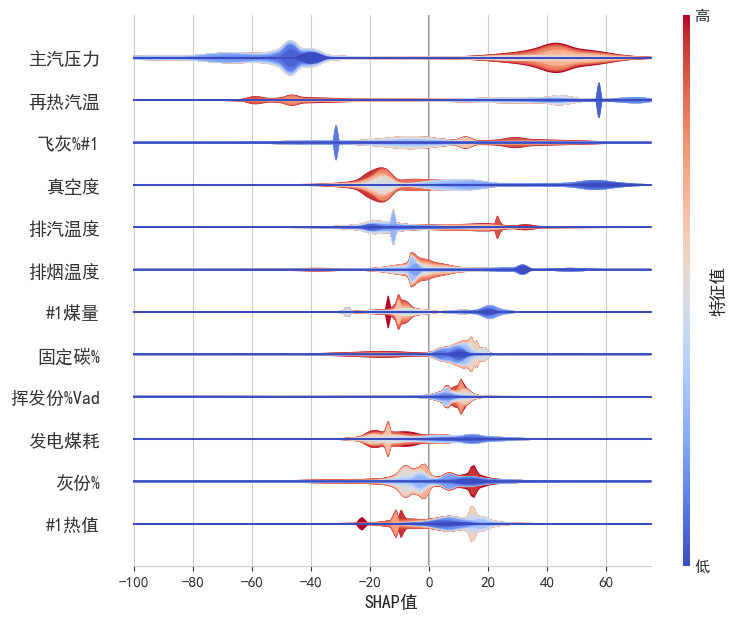

In [26]:
'''import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap, max_display=12,)


fig = plt.gcf()
ax = fig.axes[-1]
ax.set_ylabel('特征值')
# ax.yaxis.label
ax.set_yticklabels(['低', '高'])

# 获取当前的坐标轴对象
ax = plt.gca()  # 获取当前的坐标轴对象
# 设置 x 轴标签（SHAP值）
ax.set_xlabel('SHAP值')  # 修改 x 轴的标签


# Save the plot as a PNG with high resolution
# plt.savefig('shap1_violin_custom_colors.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()
'''

In [139]:
def pianYiLai(f1,f2,s1,s2):
    from sklearn.inspection import PartialDependenceDisplay
    import warnings
    warnings.filterwarnings("ignore")
    t2_features3 = [f1, f2,(f1,f2)]
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
    plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    # 生成双向部分依赖图
    disp = PartialDependenceDisplay.from_estimator(xgb_model, X1_train, t2_features3)

    disp.axes_.ravel()[0].set_ylabel('Partial dependency/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
    disp.axes_.ravel()[2].set_ylabel(s2, fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
    disp.axes_.ravel()[0].set_xlabel(s1, fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
    disp.axes_.ravel()[1].set_xlabel(s2, fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
    disp.axes_.ravel()[2].set_xlabel(s1, fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
    plt.subplots_adjust(wspace=0.7)

    # Save the plot to an image file
    #plt.savefig('partial_dependence_plot3.png', dpi=1000, bbox_inches='tight')  # Save as PNG with 500 dpi
    plt.show()

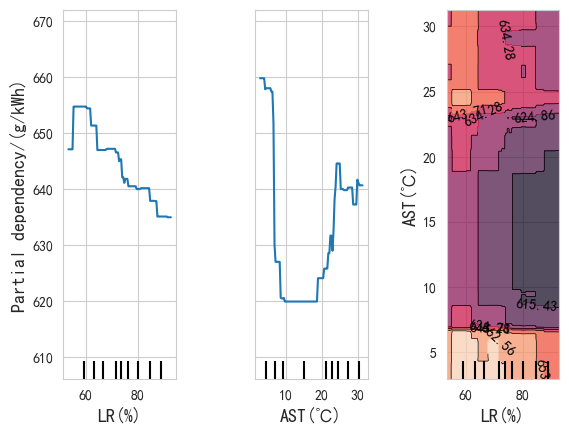

In [142]:
# pianYiLai('负荷率','进风温度','LR(%)','AST(℃)')

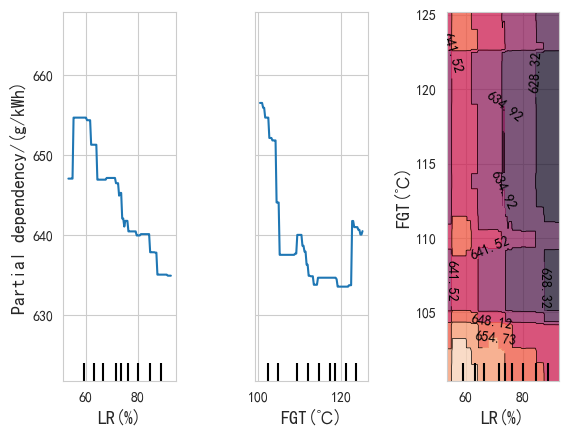

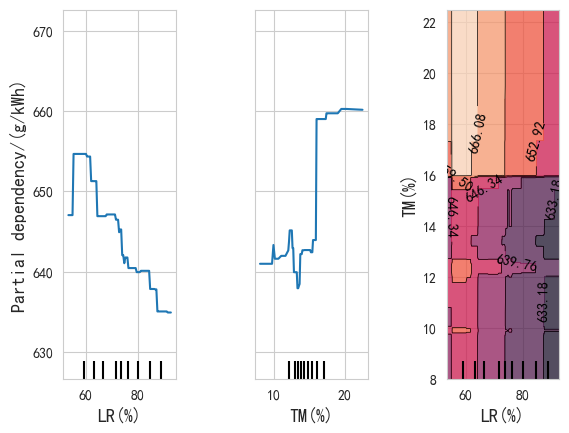

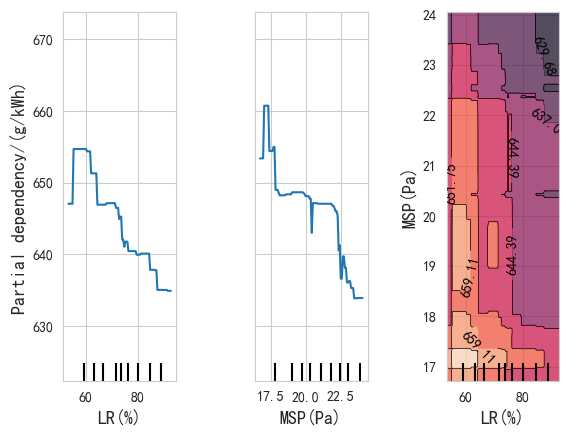

In [144]:
# pianYiLai('负荷率','排烟温度','LR(%)','FGT(℃)')
# pianYiLai('负荷率','全水分%','LR(%)','TM(%)')
# pianYiLai('负荷率','主汽压力','LR(%)','MSP(Pa)')

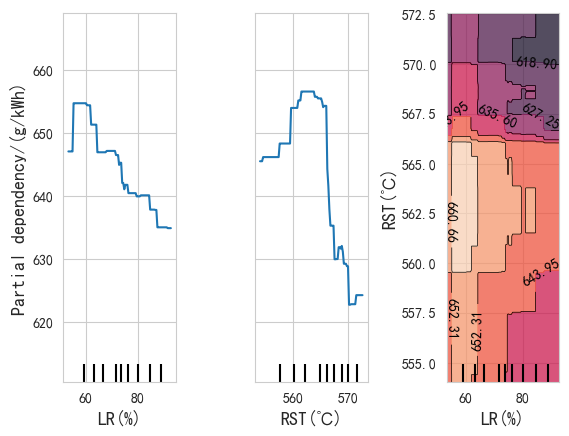

In [145]:
# pianYiLai('负荷率','再热汽温','LR(%)','RST(℃)')

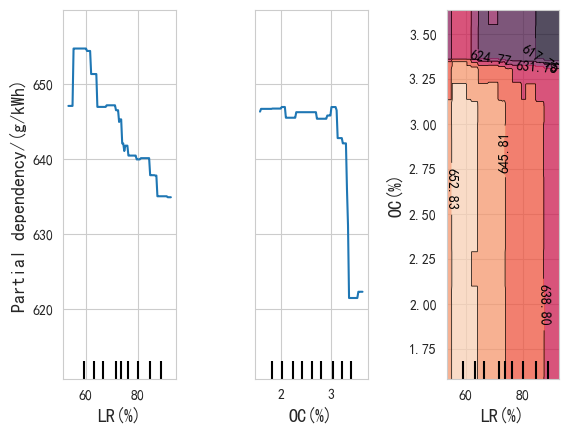

In [146]:
# pianYiLai('负荷率','烟气含氧量','LR(%)','OC(%)')

## 3.3 支持向量机

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 读取数据
data = df

# 预处理
# data['时间'] = pd.to_datetime(data['时间'])

svm_X = data.drop(columns=['碳排放强度'])
svm_y = data['碳排放强度']

# 特征缩放
scaler = StandardScaler()
svm_X_scaled = scaler.fit_transform(svm_X)


# 划分训练集和测试集
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X_scaled, svm_y, test_size=0.2, random_state=42)

# 创建并训练SVR模型
svr_model = SVR(gamma=0.004,C=105,epsilon=0.00)
svr_model.fit(svm_X_train, svm_y_train)

# 进行预测
svm_y_pred = svr_model.predict(svm_X_test)

# 评估模型
svm_mse = mean_squared_error(svm_y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(svm_y_test, svm_y_pred)
svm_mape = mean_absolute_percentage_error(svm_y_test, svm_y_pred)
svm_r2 = r2_score(svm_y_test, svm_y_pred)

print(f"svm_MSE: {svm_mse:.6f}")
print(f"svm_RMSE: {svm_rmse:.6f}")
print(f"svm_MAE: {svm_mae:.6f}")
print(f"svm_MAPE: {svm_mape*100:.6f}")
print(f"svm_R Square: {svm_r2:.6f}")

svm_MSE: 49813.115570
svm_RMSE: 223.188520
svm_MAE: 177.295980
svm_MAPE: 45.595345
svm_R Square: -0.052415


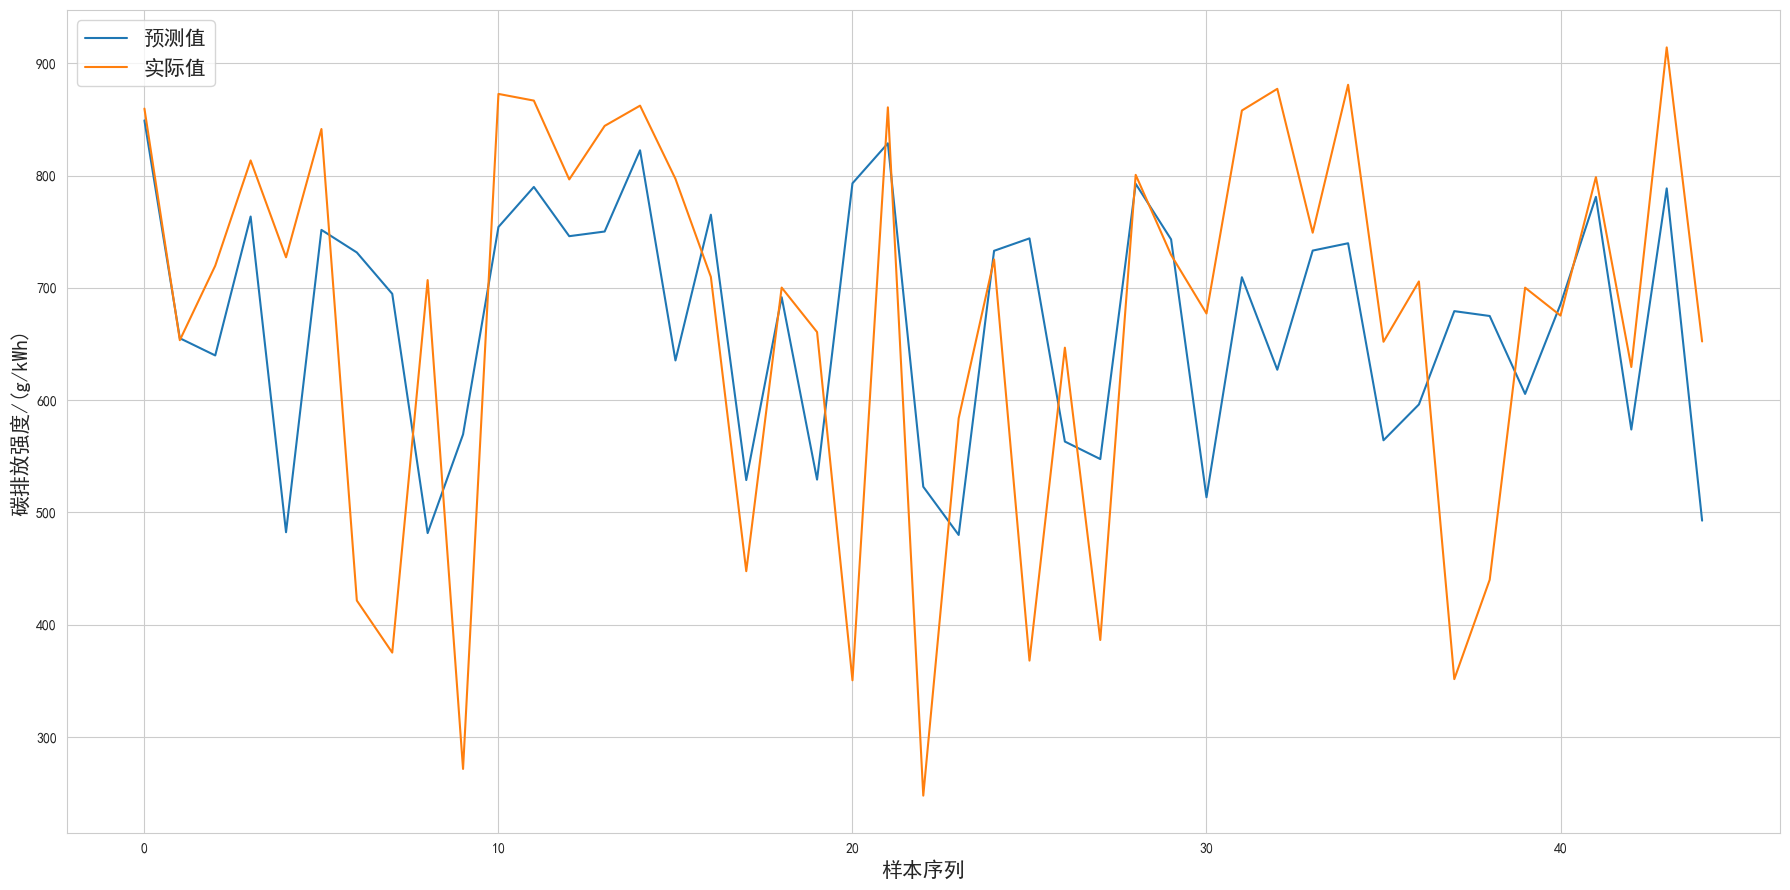

In [32]:
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(svm_y_pred, label='预测值')       # 添加预测值的标签
plt.plot(svm_y_test.values, label='实际值')  # 添加真实值的标签

# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("svm.png",dpi=500,bbox_inches='tight')
plt.show()


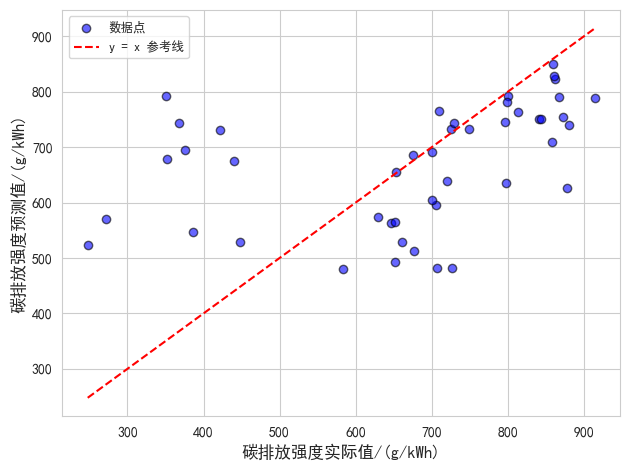

In [33]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, svm_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')
#plt.scatter(y2, svm_y2_pred, color='red', alpha=0.6, edgecolor='k', label='数据点')
# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), svm_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), svm_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度3.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

主汽压力: 14.460721868225521
再热汽温: 13.075844752052864
飞灰%#1: 10.07409090459171
排烟温度: 9.837299255199058
挥发份%Vad: 8.924709234636675
低位热量: 7.926596834564522
给水温度: 7.842297951503337
固定碳%: 7.376574038144509
全水分%: 7.250024108174321
水分%: 7.247662007805455
挥发份%Vdaf: 6.913035171992819
真空度: 6.625132243200582
全硫%ar: 6.209047438449462
#1热值: 5.855981436054898
烟气含氧量: 5.602459751010646
负荷: 4.935059359592444
全硫%ad: 4.435125556195565
主汽温度: 4.3152500846562125
运行小时: 3.2286550326671146
#1煤量: 2.6579357041825293
排汽温度: 2.1891407510417724
负荷率: 1.6168727497623885
平均负荷: 1.616872749762388
发电煤耗: 1.2942786842869085
厂用电率: 0.9704870163559389
灰份%: 0.8403333583734903
高位热量: 0.6772898845670817
进风温度: 0.6549250964065385
炉渣%#1: 0.5561659926988753


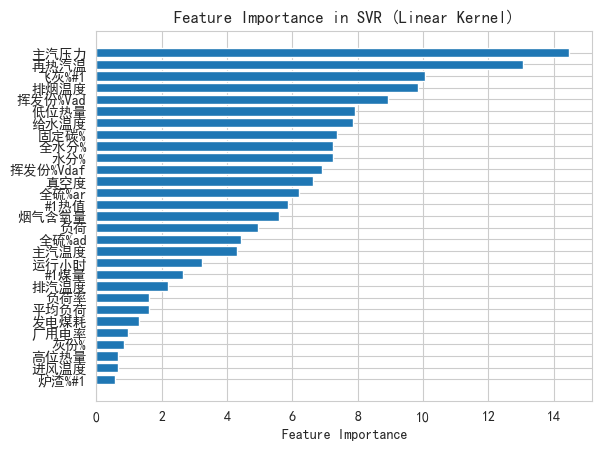

In [31]:
# Extract feature importance (for linear kernel)
feature_importance = np.abs(svr_model.coef_).flatten()

# Create a DataFrame to associate feature names with their importance
importance_df = pd.DataFrame({'Feature': svm_X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importance
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# Plot the sorted feature importance
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in SVR (Linear Kernel)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


  0%|          | 0/21 [00:00<?, ?it/s]

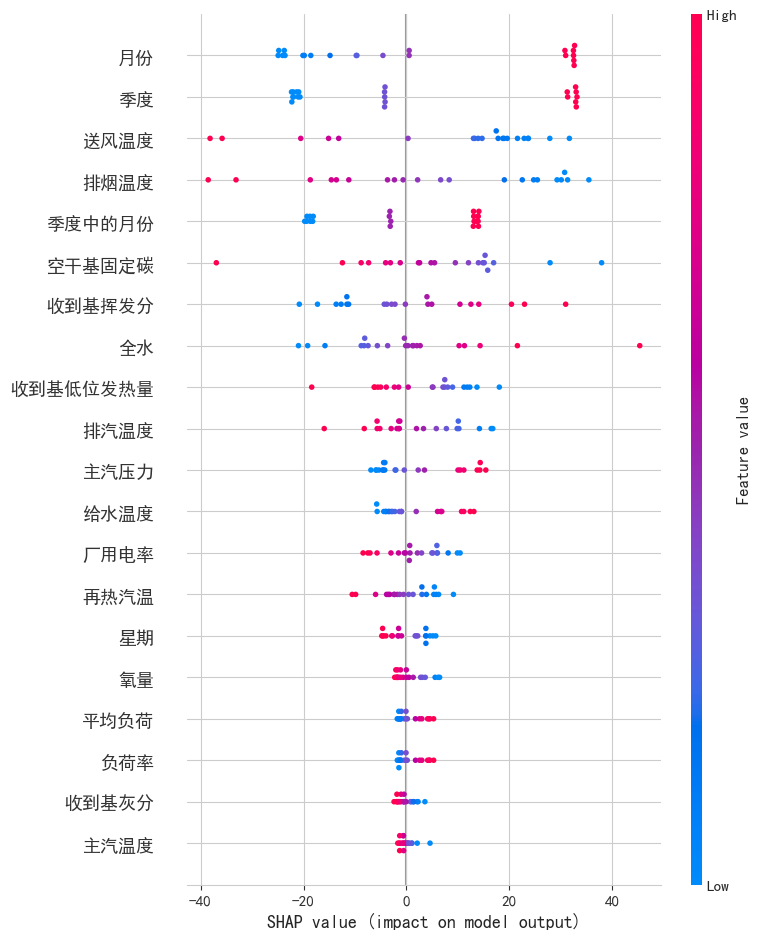

In [40]:
'''import shap
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# Use the trained SVR model to create an explainer
explainer = shap.KernelExplainer(svr_model.predict, svm_X_train)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(svm_X_test)
# Visualize feature importance using SHAP
shap.summary_plot(shap_values, svm_X_test, feature_names=svm_X.columns)
'''

## 3.4 ANN

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
device='cuda:0' if torch.cuda.is_available() else 'cpu'

def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X1):
    # 使用.iloc根据行索引位置选择数据
    X1_train = X1.iloc[train_index]
    X1_test = X1.iloc[val_index]
    y1_train = y1.iloc[train_index]  # 同样处理标签
    y1_test = y1.iloc[val_index]
    # 数据标准化
    scaler2 = StandardScaler()
    scaler3 = StandardScaler()
    X1_train_scaled=scaler2.fit_transform(X1_train)
    y1_train_scaled=scaler2.fit_transform(y1_train.to_frame())
    X1_test_scaled=scaler3.fit_transform(X1_test)
    y1_test_scaled=scaler3.fit_transform(y1_test.to_frame())
    # 转为Tensor
    X1_train_tensor=torch.FloatTensor(X1_train_scaled).to(device)
    y1_train_tensor=torch.FloatTensor(y1_train_scaled).view(-1,1).to(device)
    X1_test_tensor=torch.FloatTensor(X1_test_scaled).to(device)
    y1_test_tensor=torch.FloatTensor(y1_test_scaled).view(-1,1).to(device)

    class SimpleNN(nn.Module):
        def __init__(self, input_size):
            super(SimpleNN, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)  # 第一个隐藏层
            self.fc2 = nn.Linear(64, 32)          # 第二个隐藏层
            self.fc3 = nn.Linear(32, 1)           # 输出层

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    # 初始化模型
    input_size = X1_train.shape[1]
    model = SimpleNN(input_size).to(device)
    # 3. 定义损失函数和优化器
    criterion = nn.MSELoss().to(device)  # 均方误差损失
    optimizer = optim.SGD(model.parameters(), lr=0.06)

    # 4. 训练模型
    num_epochs = 1800
    for epoch in range(num_epochs):
        model.train()  # 设定训练模式
        optimizer.zero_grad()  # 梯度清零
        outputs = model(X1_train_tensor)  # 前向传播
        loss = criterion(outputs, y1_train_tensor)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        if (epoch + 1) % 200 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    # 5. 评估模型
    model.eval()  # 切换到评估模式
    with torch.no_grad():
        predictions = model(X1_test_tensor)  # 预测
        test_loss = criterion(predictions, y1_test_tensor)  # 计算测试损失
        print(f'Test Loss: {test_loss.item():.4f}')

    predictions=predictions.cpu().numpy().flatten()
    predictions=scaler3.inverse_transform(pd.DataFrame({'pred':predictions}))
    # Evaluate the model
    dnn_mse = mean_squared_error(y1_test, predictions)
    dnn_rmse = np.sqrt(dnn_mse)  # Calculating RMSE
    dnn_mae = mean_absolute_error(y1_test, predictions)
    dnn_mape = mean_absolute_percentage_error(y1_test, predictions)
    dnn_r2 = r2_score(y1_test, predictions)
    print(f"dnn_MSE: {dnn_mse:.6f}")
    print(f"dnn_RMSE: {dnn_rmse:.6f}")
    print(f"dnn_MAE: {dnn_mae:.6f}")
    print(f"dnn_MAPE: {dnn_mape*100:.6f}")
    print(f"dnn_R Square: {dnn_r2:.6f}")

Epoch [200/1800], Loss: 0.2254
Epoch [400/1800], Loss: 0.0865
Epoch [600/1800], Loss: 0.0276
Epoch [800/1800], Loss: 0.0071
Epoch [1000/1800], Loss: 0.0172
Epoch [1200/1800], Loss: 0.0011
Epoch [1400/1800], Loss: 0.0007
Epoch [1600/1800], Loss: 0.0006
Epoch [1800/1800], Loss: 0.0005
Test Loss: 0.7563
dnn_MSE: 35796.607158
dnn_RMSE: 189.199913
dnn_MAE: 151.831045
dnn_MAPE: 30.734248
dnn_R Square: 0.243716
Epoch [200/1800], Loss: 0.1385
Epoch [400/1800], Loss: 0.0543
Epoch [600/1800], Loss: 0.0267
Epoch [800/1800], Loss: 0.0159
Epoch [1000/1800], Loss: 0.0124
Epoch [1200/1800], Loss: 0.0065
Epoch [1400/1800], Loss: 0.0023
Epoch [1600/1800], Loss: 0.0031
Epoch [1800/1800], Loss: 0.0006
Test Loss: 1.2967
dnn_MSE: 47010.436485
dnn_RMSE: 216.818903
dnn_MAE: 177.267652
dnn_MAPE: 37.769491
dnn_R Square: -0.296690
Epoch [200/1800], Loss: 0.1718
Epoch [400/1800], Loss: 0.1017
Epoch [600/1800], Loss: 0.0552
Epoch [800/1800], Loss: 0.0332
Epoch [1000/1800], Loss: 0.0177
Epoch [1200/1800], Loss: 0.

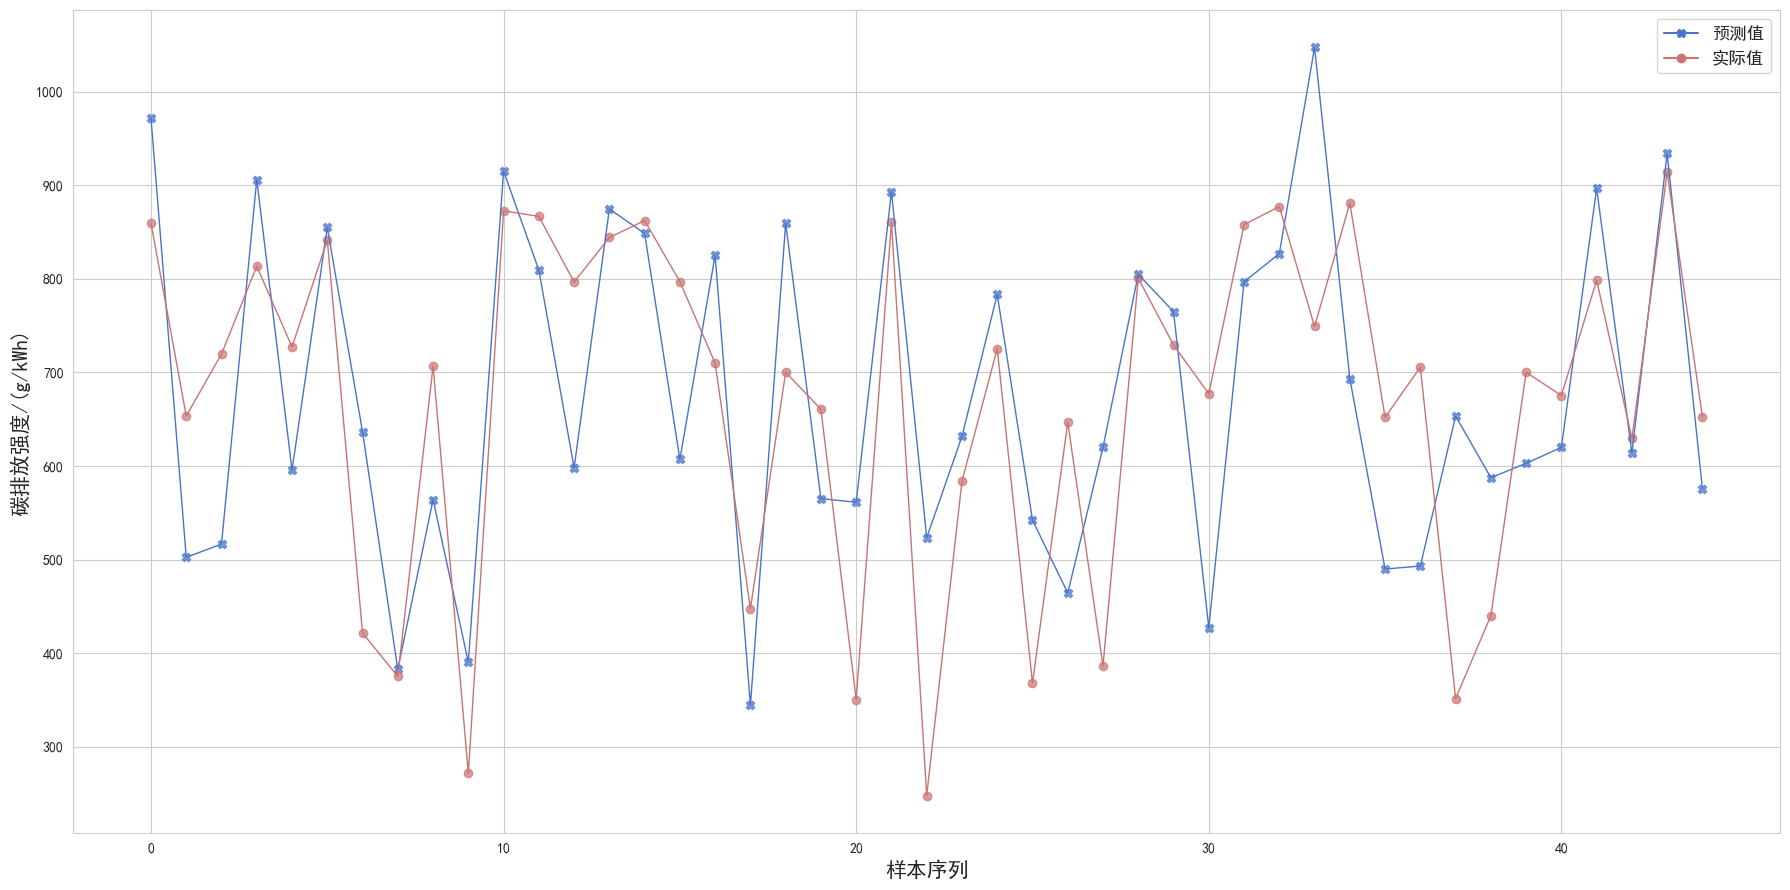

In [70]:
import matplotlib.lines as mlines  # 导入 mlines
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(predictions, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(predictions)), predictions, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test.values)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("xgb1.png",dpi=500,bbox_inches='tight')
plt.show()

## 3.4 LSTM

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

# 设置随机种子
# seed_value = 1
# np.random.seed(seed_value)
# tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

data = df
# Convert the date column to datetime
data['时间'] = pd.to_datetime(data['时间'])

# Fill missing values with the mean of the column
# data = data.fillna(data.mean())

# Select features and target
features = data.drop(columns=['碳排放强度', '时间'])
target = data['碳排放强度']

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Reshape for LSTM: (samples, time steps, features)
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = scaled_target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)
#500 32 225 16
# Make predictions
lstm_y_pred = model.predict(X_test)

# 评估模型
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mape = mean_absolute_percentage_error(y_test, lstm_y_pred)
lstm_r2 = r2_score(y_test, lstm_y_pred)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='实际')
plt.plot(lstm_y_pred, label='预测')
plt.title('LSTM测试集碳排放强度预测值vs实际值')
plt.xlabel('时间')
plt.ylabel('碳排放强度',fontsize = 11)
plt.legend()
plt.show()
print(f"LSTM_MSE: {lstm_mse:.6f}")
print(f"LSTM_RMSE: {lstm_rmse:.6f}")
print(f"LSTM_MAE: {lstm_mae:.6f}")
print(f"LSTM_MAPE: {lstm_mape*100:.6f}")
print(f"LSTM_R Square: {lstm_r2:.6f}")

#rescale
lstm_y_pred_rescaled = scaler.inverse_transform(lstm_y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# 计算真实尺度上的MSE、RMSE、MAE等
lstm_mse2 = mean_squared_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_rmse2 = np.sqrt(lstm_mse2)
lstm_mae2 = mean_absolute_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_mape2 = mean_absolute_percentage_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_r22 = r2_score(y_test_rescaled, lstm_y_pred_rescaled)

print(f"LSTM_MSE: {lstm_mse2:.6f}")
print(f"LSTM_RMSE: {lstm_rmse2:.6f}")
print(f"LSTM_MAE: {lstm_mae2:.6f}")
print(f"LSTM_MAPE: {lstm_mape2*100:.6f}")
print(f"LSTM_R Square: {lstm_r22:.6f}")

model.predict(X_test)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(lstm_y_pred_rescaled, label='预测值')
plt.plot(y_test_rescaled, label='实际值')
# plt.title('LSTM测试集碳排放强度预测值vs实际值')
# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("lstm.png",dpi=500,bbox_inches='tight')
plt.show()